In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d=pd.read_excel("aniz.xlsx")
d

,phi,h1,F1,h2,F2,h3,F3,Unnamed: 7,σ1,σ2,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,0,22.6,236,23.1,188,22.1,183,NaN,5.221239,4.069264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15,23.2,220,22.8,162,23.6,178,NaN,4.741379,3.552632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30,23.0,205,23.4,155,23.1,144,NaN,4.456522,3.311966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45,23.9,201,22.3,127,22.7,110,NaN,4.205021,2.847534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60,22.6,178,23.8,155,21.9,102,NaN,3.938053,3.256303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75,22.1,188,21.8,98,22.1,99,NaN,4.253394,2.247706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,90,22.7,175,23.3,110,23.2,111,NaN,3.854626,2.360515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
c=['phi','s1n','s2n','s3n']
dd=np.array([d[cc] for cc in c])
dd[0]/=180/np.pi

In [4]:
def f(x, a, b):
    return a/np.sqrt((a**2)*(np.cos(x)**4)+np.sin(x)**4+b*(np.sin(x)**2)*(np.cos(x)**2)) 

In [5]:
from scipy.optimize import curve_fit

In [6]:
import dis
dis.dis(f)

  2           0 LOAD_FAST                1 (a)
              2 LOAD_GLOBAL              0 (np)
              4 LOAD_METHOD              1 (sqrt)
              6 LOAD_FAST                1 (a)
              8 LOAD_CONST               1 (2)
             10 BINARY_POWER
             12 LOAD_GLOBAL              0 (np)
             14 LOAD_METHOD              2 (cos)
             16 LOAD_FAST                0 (x)
             18 CALL_METHOD              1
             20 LOAD_CONST               2 (4)
             22 BINARY_POWER
             24 BINARY_MULTIPLY
             26 LOAD_GLOBAL              0 (np)
             28 LOAD_METHOD              3 (sin)
             30 LOAD_FAST                0 (x)
             32 CALL_METHOD              1
             34 LOAD_CONST               2 (4)
             36 BINARY_POWER
             38 BINARY_ADD
             40 LOAD_FAST                2 (b)
             42 LOAD_GLOBAL              0 (np)
             44 LOAD_METHOD              3 (sin)
   

In [7]:
popt,popc=curve_fit(f, dd[0], dd[1], method = 'lm')
popt,popc

(array([0.77437817, 2.24843587]),
 array([[0.00060452, 0.00558153],
        [0.00558153, 0.09061358]]))

In [19]:
from matplotlib.ticker import MultipleLocator

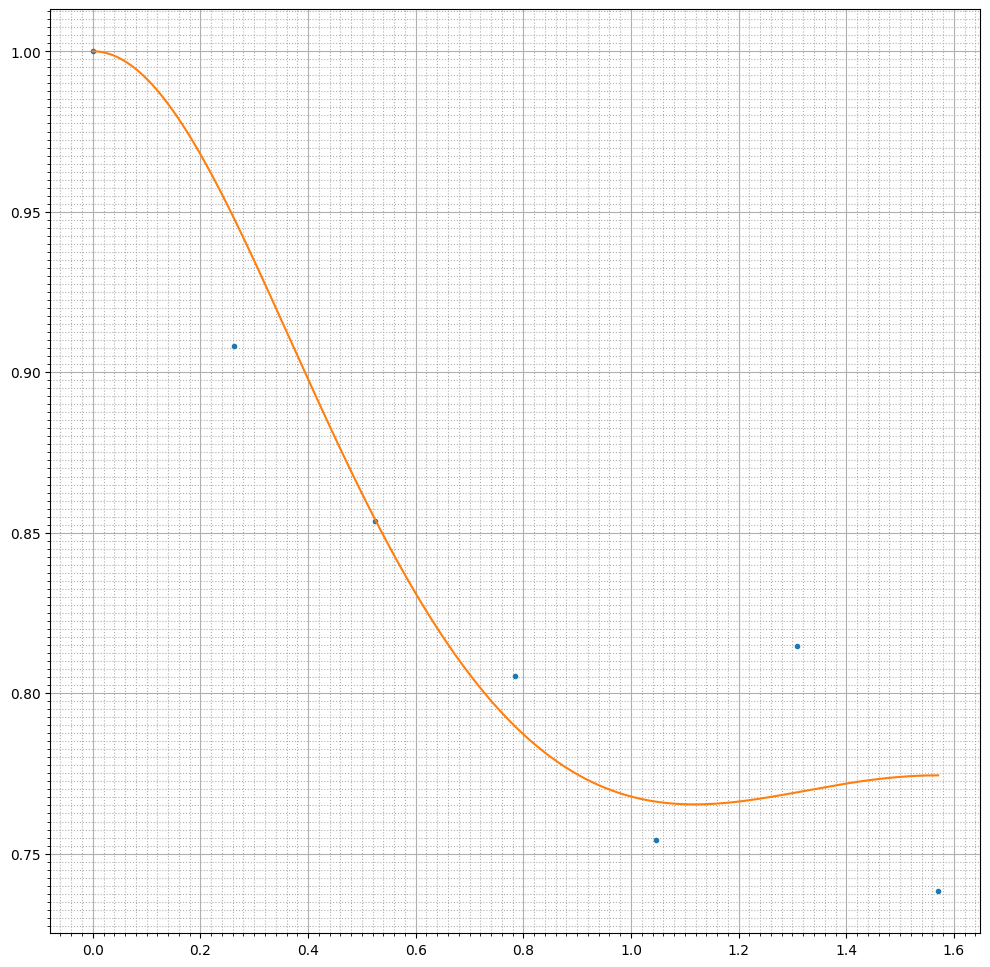

In [27]:
x=np.linspace(0,np.pi/2,1000)
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(dd[0],dd[1],'.')
ax.plot(x,f(x,*popt))
ax.minorticks_on()
ax.grid(which='minor', linestyle=':')
ax.grid(which='major')

# Set major and minor ticks for x-axis
ax.xaxis.set_major_locator(MultipleLocator(0.2))  # Major every 1 unit
ax.xaxis.set_minor_locator(MultipleLocator(0.02))  # Minor every 0.2 units

# Set major and minor ticks for y-axis
ax.yaxis.set_major_locator(MultipleLocator(0.05))  # Major every 0.5 units
ax.yaxis.set_minor_locator(MultipleLocator(0.05/20))  # Minor every 0.1 units

C:\Users\Daniil\AppData\Local\Temp\ipykernel_16640\1652435665.py:46: RankWarning: Polyfit may be poorly conditioned
  x0 = np.polyfit(x_data, y_data, deg)


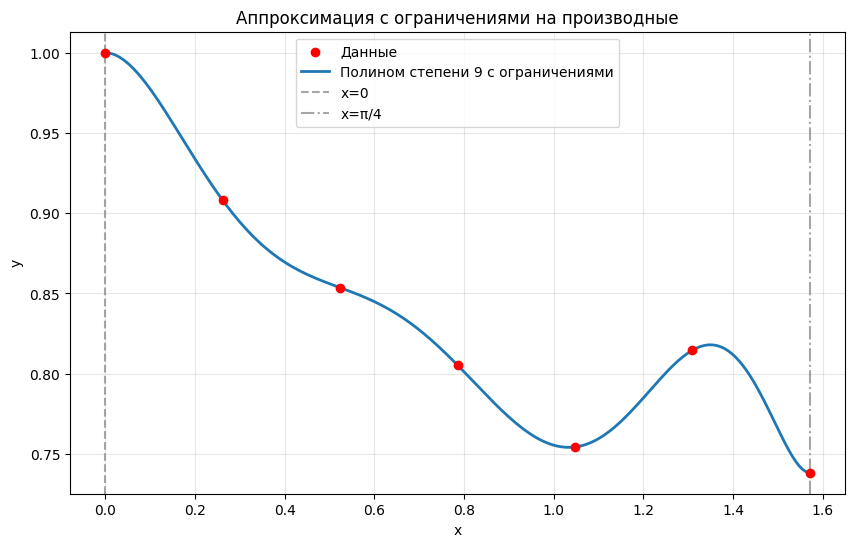

Коэффициенты полинома (от старшей степени к младшей):
[ 1.77802402 -7.29087498  7.81827884  2.99730053 -6.80290465 -3.17630016
  7.38972372 -2.95784111  0.          1.        ]

Проверка ограничений:
p(0)      = 1.000000 (должно быть 1)
p'(0)     = 0.000000 (должно быть 0)
p'(π/2)   = -0.000000 (должно быть 0)
p''(0)    = -5.915682 (должно быть < 0)
p''(π/2)  = -0.406043 (должно быть > 0)


In [15]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Пример данных (замените на свои)
x_data = dd[0]
y_data = dd[1]

deg = 9  # степень полинома

# Маленькое число для "строгих" неравенств
eps = 1e-6

# Целевая функция: сумма квадратов ошибок
def objective(coeffs):
    p = np.poly1d(coeffs)
    return np.sum((p(x_data) - y_data) ** 2)

# === Ограничения-равенства (eq) ===
def constraint_p0(coeffs):
    # p(0) = coeffs[-1] (последний коэффициент — свободный член)
    return coeffs[-1] - 1

def constraint_dp0(coeffs):
    # p'(0) = coeffs[-2] (коэффициент при x^1)
    return coeffs[-2] - 0

def constraint_dp_pi2(coeffs):
    p = np.poly1d(coeffs)
    dp = np.polyder(p)
    return dp(np.pi/2) - 0

# === Ограничения-неравенства (ineq) ===
def constraint_d2p0_negative(coeffs):
    # p''(0) = 2 * coeffs[-3] (коэффициент при x^2)
    # Нам нужно p''(0) < 0, т.е. -p''(0) > 0
    return -2 * coeffs[-3] - eps  # Должно быть >= 0

def constraint_d2p_pi2_positive(coeffs):
    # p''(pi/4) > 0
    p = np.poly1d(coeffs)
    d2p = np.polyder(p, 2)  # Вторая производная
    return d2p(np.pi/2) - eps  # Должно быть >= 0

# Начальное приближение: обычный полином без ограничений
x0 = np.polyfit(x_data, y_data, deg)

# Формируем списки ограничений
constraints = [
    # Равенства
    {'type': 'eq', 'fun': constraint_p0},
    {'type': 'eq', 'fun': constraint_dp0},
    {'type': 'eq', 'fun': constraint_dp_pi2},
    # Неравенства
    {'type': 'ineq', 'fun': constraint_d2p0_negative},
    {'type': 'ineq', 'fun': constraint_d2p_pi2_positive}
]

# Оптимизация
result = minimize(objective, x0, constraints=constraints, method='SLSQP', options={'ftol': 1e-12})

# Результат
if result.success:
    coeffs_opt = result.x
    p_opt = np.poly1d(coeffs_opt)
    
    # Визуализация
    x_plot = np.linspace(0, np.pi/2, 200)
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, label='Данные', color='red', zorder=5)
    plt.plot(x_plot, p_opt(x_plot), label=f'Полином степени {deg} с ограничениями', linewidth=2)
    plt.axvline(0, color='gray', linestyle='--', alpha=0.7, label='x=0')
    plt.axvline(np.pi/2, color='gray', linestyle='-.', alpha=0.7, label='x=π/4')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Аппроксимация с ограничениями на производные')
    plt.show()
    
    # Проверка всех ограничений
    p_prime = np.polyder(p_opt)
    p_double_prime = np.polyder(p_opt, 2)
    
    print("Коэффициенты полинома (от старшей степени к младшей):")
    print(coeffs_opt)
    print("\nПроверка ограничений:")
    print(f"p(0)      = {p_opt(0):.6f} (должно быть 1)")
    print(f"p'(0)     = {p_prime(0):.6f} (должно быть 0)")
    print(f"p'(π/2)   = {p_prime(np.pi/2):.6f} (должно быть 0)")
    print(f"p''(0)    = {p_double_prime(0):.6f} (должно быть < 0)")
    print(f"p''(π/2)  = {p_double_prime(np.pi/4):.6f} (должно быть > 0)")
    
else:
    print("Оптимизация не удалась:", result.message)
    print("Попробуйте другую степень полинома или начальное приближение.")

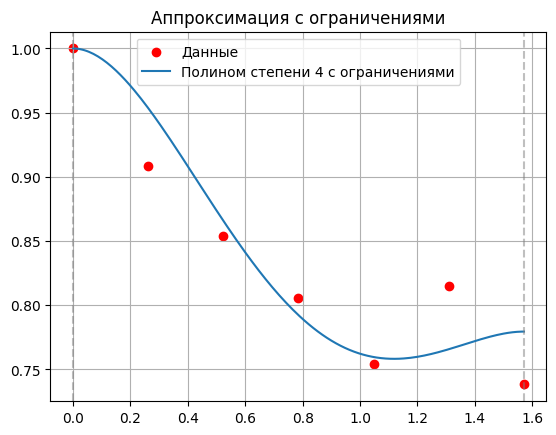

Коэффициенты: [-0.25611344  0.91840606 -0.90007416  0.          1.        ]
p(0) = 1.0
p'(0) = 0.0
p'(π/2) = -0.2105963351255361


In [68]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Пример данных (замените на свои)
x_data = dd[0]
y_data = dd[1]

deg = 4  # степень полинома
# Целевая функция: сумма квадратов ошибок
def objective(coeffs):
    p = np.poly1d(coeffs)
    return np.sum((p(x_data) - y_data) ** 2)

# Ограничения
def constraint_p0(coeffs):
    # p(0) = coeffs[-1] (последний коэффициент — свободный член)
    return coeffs[-1] - 1

def constraint_dp0(coeffs):
    # p'(0) = coeffs[-2] (коэффициент при x^1)
    return coeffs[-2] - 0

def constraint_dp_pi2(coeffs):
    p = np.poly1d(coeffs)
    dp = np.polyder(p)
    return dp(np.pi/2) - 0

# Начальное приближение: обычный полином без ограничений
x0 = np.polyfit(x_data, y_data, deg)

# Ограничения
constraints = [
    {'type': 'eq', 'fun': constraint_p0},
    {'type': 'eq', 'fun': constraint_dp0},
    {'type': 'eq', 'fun': constraint_dp_pi2}
]

# Оптимизация
result = minimize(objective, x0, constraints=constraints, method='SLSQP')

# Результат
if result.success:
    coeffs_opt = result.x
    p_opt = np.poly1d(coeffs_opt)
    
    # Визуализация
    x_plot = np.linspace(0, np.pi/2, 200)
    plt.scatter(x_data, y_data, label='Данные', color='red')
    plt.plot(x_plot, p_opt(x_plot), label=f'Полином степени {deg} с ограничениями')
    plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(np.pi/2, color='gray', linestyle='--', alpha=0.5)
    plt.legend()
    plt.grid(True)
    plt.title('Аппроксимация с ограничениями')
    plt.show()
    
    # Проверка ограничений
    print("Коэффициенты:", coeffs_opt)
    print("p(0) =", p_opt(0))
    print("p'(0) =", np.polyder(p_opt)(0))
    print("p'(π/2) =", np.polyder(p_opt)(np.pi/4))
else:
    print("Оптимизация не удалась:", result.message)